For gamma= 0.001 :
minimum value of L2 distance :  2.0150886471295886
25% value of L2 distance :  2.016051527550159
median value of L2 distance : :  2.0161872233459173
75% value of L2 distance : :  2.016339427810008
maximum value of L2 distance :  2.017251229537448


For gamma= 0.01 :
minimum value of L2 distance :  1.8832530730194637
25% value of L2 distance :  2.003890605248728
median value of L2 distance : :  2.0161511768788953
75% value of L2 distance : :  2.0351318757279895
maximum value of L2 distance :  2.188768330242105


For gamma= 0.1 :
minimum value of L2 distance :  1.5376728933670663
25% value of L2 distance :  5.353710197779233
median value of L2 distance : :  16.55263103338235
75% value of L2 distance : :  39.5334526117106
maximum value of L2 distance :  371.2783103893785


For gamma= 1 :
minimum value of L2 distance :  0.36639327395386795
25% value of L2 distance :  769.9261986931207
median value of L2 distance : :  4396.954880601634
75% value of L2 distance : :  9996.0

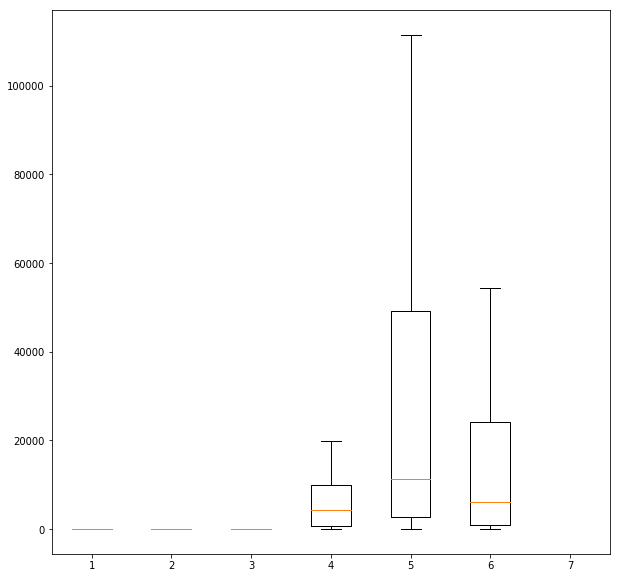

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
l=[]
for i in range(-3,3):
    q=[]
    for j in range(100):
        sigma=100
        v=np.random.normal(0,sigma)
        x=np.random.uniform(-1,1,(10,4))
        gamma=10**i
        x[:,3]=1
        x1=x[:,2]
        xsq=x[:,1]**2
        xcube=x[:,0]**3
        X=np.array([xcube,xsq,x1,10*[1]]).reshape(10,4)
        # a,b,c,d values
        w_true=np.array([1,-1,-0.09,0.09]).reshape(4,1)
        y_true=X@w_true+v
        w_map=np.linalg.inv((np.identity(4)/gamma**2+X.T@X))@X.T@y_true
    
        l2_distance=np.sum((w_map-w_true)**2)
        l.append(l2_distance)
        q.append(l2_distance)
    
    print("For gamma=",10**i,":")
    print("minimum value of L2 distance : ", np.quantile(q, 0))
    print("25% value of L2 distance : ", np.quantile(q, .25)) 
    print("median value of L2 distance : : ", np.quantile(q, .50)) 
    print("75% value of L2 distance : : ", np.quantile(q, .75))
    print("maximum value of L2 distance : ", np.quantile(q, 1))
    print("\n")

d1=l[:100]
d2=l[100:200]
d3=l[200:300]
d4=l[300:400]
d5=l[400:500]
d6=l[500:600]
d7=l[600:700]
data=[d1,d2,d3,d4,d5,d6,d7]
plt.figure(figsize=(10,10))
plt.boxplot(data,positions=[1,2,3,4,5,6,7],showfliers=False)
plt.show() 